In [2]:
!pip install kaggle


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"maxashoka","key":"b9a7e6074cdb8aea0f369fde55c833b5"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle competitions download -c dogs-vs-cats
!unzip dogs-vs-cats.zip -d dataset

Archive:  dogs-vs-cats.zip
  inflating: dataset/sampleSubmission.csv  
  inflating: dataset/test1.zip       
  inflating: dataset/train.zip       


In [8]:
!mkdir -p /content/train # Create the directory
!mkdir -p /content/test # Create the directory

In [9]:
!unzip /content/dataset/train.zip -d /content/train

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/train/dog.5499.jpg  
  inflating: /content/train/train/dog.55.jpg  
  inflating: /content/train/train/dog.550.jpg  
  inflating: /content/train/train/dog.5500.jpg  
  inflating: /content/train/train/dog.5501.jpg  
  inflating: /content/train/train/dog.5502.jpg  
  inflating: /content/train/train/dog.5503.jpg  
  inflating: /content/train/train/dog.5504.jpg  
  inflating: /content/train/train/dog.5505.jpg  
  inflating: /content/train/train/dog.5506.jpg  
  inflating: /content/train/train/dog.5507.jpg  
  inflating: /content/train/train/dog.5508.jpg  
  inflating: /content/train/train/dog.5509.jpg  
  inflating: /content/train/train/dog.551.jpg  
  inflating: /content/train/train/dog.5510.jpg  
  inflating: /content/train/train/dog.5511.jpg  
  inflating: /content/train/train/dog.5512.jpg  
  inflating: /content/train/train/dog.5513.jpg  
  inflating: /content/train/train/dog.5514.jpg  
  inflating: /content/

In [10]:
!unzip /content/dataset/test1.zip -d /content/test

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/test1/5499.jpg  
  inflating: /content/test/test1/55.jpg  
  inflating: /content/test/test1/550.jpg  
  inflating: /content/test/test1/5500.jpg  
  inflating: /content/test/test1/5501.jpg  
  inflating: /content/test/test1/5502.jpg  
  inflating: /content/test/test1/5503.jpg  
  inflating: /content/test/test1/5504.jpg  
  inflating: /content/test/test1/5505.jpg  
  inflating: /content/test/test1/5506.jpg  
  inflating: /content/test/test1/5507.jpg  
  inflating: /content/test/test1/5508.jpg  
  inflating: /content/test/test1/5509.jpg  
  inflating: /content/test/test1/551.jpg  
  inflating: /content/test/test1/5510.jpg  
  inflating: /content/test/test1/5511.jpg  
  inflating: /content/test/test1/5512.jpg  
  inflating: /content/test/test1/5513.jpg  
  inflating: /content/test/test1/5514.jpg  
  inflating: /content/test/test1/5515.jpg  
  inflating: /content/test/test1/5516.jpg  
  inflating: /content/test/te

In [11]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset
dataset_path = "/content/train"
dataset = ImageFolder(root=dataset_path, transform=transform)

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f"Train samples: {len(train_dataset)}, Validation samples: {len(val_dataset)}")


Train samples: 20000, Validation samples: 5000


In [12]:
import torch.nn as nn
import torchvision.models as models

# Load pre-trained VGG16 model
base_model = models.vgg16(pretrained=True)

# Freeze all layers in the base model
for param in base_model.features.parameters():
    param.requires_grad = False

# Modify the classifier for binary classification (Dogs vs. Cats)
base_model.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1),
    nn.Sigmoid()  # Binary classification output
)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
base_model = base_model.to(device)

print(base_model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 133MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(base_model.classifier.parameters(), lr=0.001)

# Training loop
def train(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)  # Move to GPU
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

    print("Training complete.")

train(base_model, train_loader, val_loader, epochs=10)


Epoch [1/10], Loss: 0.0011
Epoch [2/10], Loss: 0.0000
Epoch [3/10], Loss: 0.0000
Epoch [4/10], Loss: 0.0000
Epoch [5/10], Loss: 0.0000
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0000
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0000
Training complete.


In [14]:
torch.save(base_model.state_dict(), "dog_vs_cat_model.pth")
print("Model saved successfully!")


Model saved successfully!


In [15]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.nn as nn

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load test dataset
test_dataset = ImageFolder(root="test", transform=transform)  # Update path if needed
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=False)
model.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load("dog_vs_cat_model.pth", map_location=device))
model.to(device)
model.eval()  # Set model to evaluation mode


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
model.eval()  #

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Initialize lists for true labels and predictions
y_true, y_pred = [], []

# Disable gradient computation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU
        outputs = model(images)
        preds = (outputs >= 0.5).int()  # Convert to binary (0 or 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Print Results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print(f"✅ Confusion Matrix:\n{conf_matrix}")


✅ Accuracy: 1.0000
✅ Precision: 0.0000
✅ Recall: 0.0000
✅ F1-score: 0.0000
✅ Confusion Matrix:
[[12500]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py

In [18]:
print(f"✅ Confusion Matrix:\n{conf_matrix}")

✅ Confusion Matrix:
[[12500]]


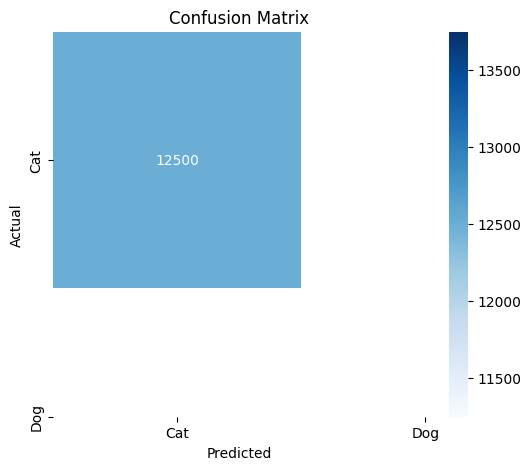

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torchvision.models as models
import torch.nn as nn

# Load the trained model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(pretrained=False)
model.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load("dog_vs_cat_model.pth", map_location=device))
model.to(device)
model.eval()  # Set model to evaluation mode

# Define image transformation (same as training)
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Function to predict an image
def predict_image(image_path):
    image = Image.open(image_path)  # Load image
    image = transform(image).unsqueeze(0).to(device)  # Apply transforms & add batch dimension

    with torch.no_grad():
        output = model(image).item()

    prediction = "Dog 🐶" if output >= 0.5 else "Cat 🐱"
    print(f"Prediction: {prediction}")
    return prediction


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [27]:
# Provide the path to an image (replace with your image path)
image_path = "/content/test/test1/10.jpg"  # Change this to your test image
predict_image(image_path)


Prediction: Cat 🐱


'Cat 🐱'

In [28]:
!git clone https://github.com/YOUR_USERNAME/dog-vs-cat-classifier.git
%cd dog-vs-cat-classifier


Cloning into 'dog-vs-cat-classifier'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'dog-vs-cat-classifier'
/content


In [29]:
from google.colab import files
files.download("dog_vs_cat_model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
import shutil
shutil.copy("dog_vs_cat_model.pth", "/content/drive/MyDrive/30 days challange/")


'/content/drive/MyDrive/30 days challange/dog_vs_cat_model.pth'

In [ ]:
# Deployment in gradio

In [31]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.4 MB/s eta 0:00:00


In [32]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import gradio as gr
import torchvision.models as models
import torch.nn as nn

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model architecture (same as training)
model = models.vgg16(pretrained=False)
model.classifier = nn.Sequential(
    nn.Linear(25088, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 1),
    nn.Sigmoid()
)

# Load trained model weights
model.load_state_dict(torch.load("dog_vs_cat_model.pth", map_location=device))
model.to(device)
model.eval()

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Prediction function
def predict(image):
    image = transform(image).unsqueeze(0).to(device)  # Preprocess image
    with torch.no_grad():
        output = model(image).item()  # Get prediction
    return "Dog 🐶" if output >= 0.5 else "Cat 🐱"

# Gradio Interface
iface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🐶🐱 Dog vs. Cat Classifier",
    description="Upload an image of a dog or cat, and the model will classify it!",
    allow_flagging="never"
)

# Run Gradio in Colab
iface.launch(share=True)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2db3f2bd2c65e4b8a2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
